## Image Classification

In [84]:
#import library
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

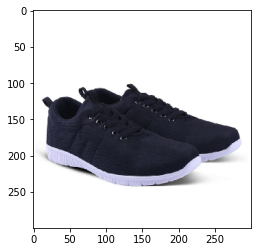

In [86]:
#shpowing the sample of the image
import matplotlib.pyplot as plt
x = load_img('sepatu_pict.jpg', target_size=(300,300))
plt.imshow(x)

In [87]:
#convert into array and see the shape
x = img_to_array(x)
x.shape

(300, 300, 3)

## Trying import file

In [88]:
import pandas as pd
df = pd.read_csv('test_image.csv')
df

#note : 0 for shoes and 1 for glove

,filename,category
0,sepatu2.jpg,0
1,sepatu3.jpg,0
2,sepatu4.jpg,0
3,sarung1.jpg,1
4,sarung2.jpg,1
5,sarung3.jpg,1
6,sarung4.jpg,1
7,sepatu_pict.jpg,1


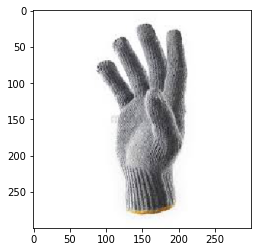

In [89]:
x1 = load_img('sarung1.jpg', target_size=(300,300))
plt.imshow(x1)

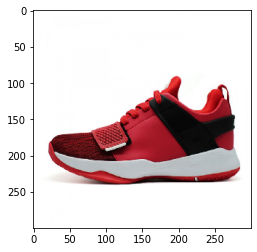

In [90]:
x2 = load_img('sepatu2.jpg', target_size=(300,300))
plt.imshow(x2)

In [91]:
#transfer image into list 

list_pict = []

for i in df.filename :
  x = load_img(i, target_size=(300,300))
  x = img_to_array(x)
  list_pict.append(x)

#transfer label into list

list_category = list(df.category)

In [93]:
np.array(list_pict).shape

(8, 300, 300, 3)

In [94]:
np.array(list_category).shape

(8,)

##Modelling Part using Very Simple Keras

In [95]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


model = keras.Sequential([keras.layers.Flatten(input_shape=(300, 300, 3)), #Flatten has the same size with image
                          keras.layers.Dense(256, activation=tf.nn.relu), #optional dense in neural network
                          keras.layers.Dense(2,activation=tf.nn.softmax) #using softmax as activation function
])

model.compile (optimizer=keras.optimizers.Adam(),  #using Adam optimizer
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [96]:
#train the model using 30 epoch

model.fit(np.array(list_pict), np.array(list_category), epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 2ms/step - loss: 47.5493 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 1ms/step - loss: 1407.8331 - accuracy: 0.8750
Epoch 3/30
1/1 [==============================] - 0s 1ms/step - loss: 139856.7344 - accuracy: 0.3750
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 2137.0005 - accuracy: 0.8750
Epoch 5/30
1/1 [==============================] - 0s 1ms/step - loss: 52330.7500 - accuracy: 0.6250
Epoch 6/30
1/1 [==============================] - 0s 1ms/step - loss: 38671.2305 - accuracy: 0.6250
Epoch 7/30
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 1ms/step - loss: 24376.9453 - accuracy: 0.3750
Epoch 9/30
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 1ms/step - loss: 1832.9482 - accuracy: 0.8750
Epoc

In [97]:
#test loss function using all data in training

test_loss, test_acc = model.evaluate(np.array(list_pict), np.array(list_category))
print("loss : ", test_loss)
print("accuracy : ", test_acc)

1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
loss :  0.0
accuracy :  1.0


## Testing image

sepatu


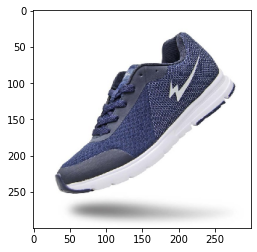

In [99]:
#testing sepatu

x_test1 = load_img('sepatu4.jpg', target_size=(300,300))
plt.imshow(x_test1)
x_test1 = img_to_array(x_test1)


list_test = []
list_test.append(x_test1)

y = model.predict(np.array(list_test))

if (np.argmax(y) == 0) :
  print('sepatu')
else:
  print('sarung tangan')

sarung tangan


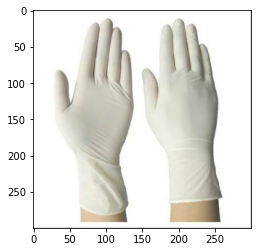

In [100]:
#testing sarung tangan

x_test1 = load_img('sarung3.jpg', target_size=(300,300))
plt.imshow(x_test1)
x_test1 = img_to_array(x_test1)


list_test = []
list_test.append(x_test1)

y = model.predict(np.array(list_test))

if (np.argmax(y) == 0) :
  print('sepatu')
else:
  print('sarung tangan')

## Testing External Image

sarung tangan


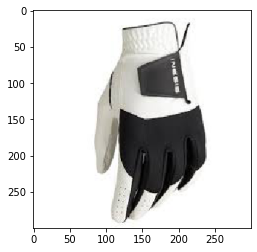

In [101]:
#testing sarung tangan 

x_test1 = load_img('sarung_test.jpg', target_size=(300,300))
plt.imshow(x_test1)
x_test1 = img_to_array(x_test1)


list_test = []
list_test.append(x_test1)

y = model.predict(np.array(list_test))

if (np.argmax(y) == 0) :
  print('sepatu')
else:
  print('sarung tangan')

## Wrong prediction

sarung tangan


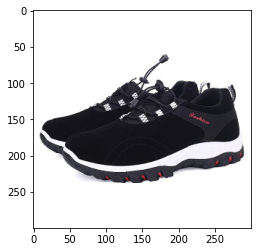

In [102]:
#testing sepatu

x_test1 = load_img('test1_sepatu.jpg', target_size=(300,300))
plt.imshow(x_test1)
x_test1 = img_to_array(x_test1)


list_test = []
list_test.append(x_test1)

y = model.predict(np.array(list_test))

if (np.argmax(y) == 0) :
  print('sepatu')
else:
  print('sarung tangan')

Probably, wrong prediction is false due to the number of training model is too little. So model could not recognize the pattern